# Exploratory Data Analytics on Jobs and Salaries #

## 1. Introduction ##

#### 1.1 Sypnosis ####

This Exploratory Data Analysis has observations with each step in order to thorougly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

#### 1.2 Data Source and Data Set ####

This dataset contains the updated 2024 data from the Jobs and Salaries in Data Science dataset. The information is sourced from ai-jobs.net/salaries/2024/.

## 2. Load the Packages and Data ##

#### 2.1 Import Libraries or Modules ####

In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px

plt.style.use('fivethirtyeight')

#### 2.2 Load the Dataset ####

In [87]:
df = pd.read_csv("salaries.csv")

## 3. Data Profiling (Data Exploration) ##

#### 3.1 Understanding the Data Set ####

Some basic information to give a more informative approach to the database before analyzing.

In [88]:
df.sample(5) # sample of 5 rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
26558,2023,SE,FT,Data Analyst,145000,USD,145000,US,100,US,M
19880,2024,EN,FT,Machine Learning Engineer,243300,USD,243300,US,0,US,M
3967,2024,SE,FT,Engineering Manager,261500,USD,261500,US,0,US,M
25050,2024,MI,FT,Machine Learning Engineer,210100,USD,210100,US,0,US,M
27244,2023,EX,FT,Data Engineer,268000,USD,268000,US,100,US,M


In [89]:
df.shape # to show the total number of columns and rows

(36809, 11)

> * This dataset contains 36809 rows and 11 columns

In [90]:
df.columns #To show the name of each column

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [91]:
df.dtypes # to show data type of each column

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [92]:
df.info() #to show indexes, data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36809 entries, 0 to 36808
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           36809 non-null  int64 
 1   experience_level    36809 non-null  object
 2   employment_type     36809 non-null  object
 3   job_title           36809 non-null  object
 4   salary              36809 non-null  int64 
 5   salary_currency     36809 non-null  object
 6   salary_in_usd       36809 non-null  int64 
 7   employee_residence  36809 non-null  object
 8   remote_ratio        36809 non-null  int64 
 9   company_location    36809 non-null  object
 10  company_size        36809 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


In [93]:
df.describe() # to show statistical information about the data

,work_year,salary,salary_in_usd,remote_ratio
count,36809.000000,3.680900e+04,36809.000000,36809.000000
mean,2023.652476,1.668014e+05,160530.633622,23.332609
std,0.613867,2.350271e+05,72692.090281,42.088519
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [94]:
df.describe(exclude=np.number) # to show the overall count and uniqueness of the rows

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,36809,36809,36809,36809,36809,36809,36809
unique,4,4,215,24,91,80,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,22279,36698,7382,35029,33369,33420,35165


#### 3.1.1 How many unique title jobs are there? ####

In [95]:
df['job_title'].nunique()

215

#### 3.1.2 How many unique job salaries are there? ####

In [96]:
df['salary'].nunique()

4451

## 3.2 Data Preparation (Data Cleaning) ##

#### 3.2.1 Are there any missing values? ####

In [97]:
# Finding out how many unique values are in the dataset
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: >

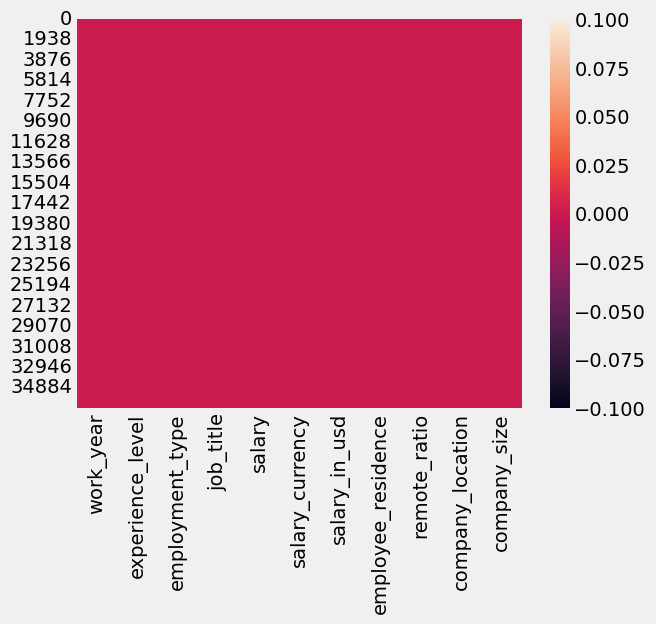

In [98]:
sns.heatmap(df.isnull()) # using heatmap to show if there are any null values visually

> * From the above output we can see that there are no missing values.

#### 3.2.2 Are there any duplicate rows? ####

In [99]:
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f'Number of duplicate rows:', num_duplicates, "Percentage from the total:", round(num_duplicates/len(df),3)*100)

Number of duplicate rows: 17943 Percentage from the total: 48.699999999999996


> * **Note:** The data set contains 17943 duplicates, representing 48.699% of the data set. I have chosen to retain these duplicates, as they appear to represent different entries from the dataset with identical responses. This is plausible, as specific positions/roles may have identical work settings and salaries within a given country.

#### 3.2.3 Drop salary and salary currency columns ####

Since these two columns will not contribute to any analysis, we will remove them from the dataset.

In [100]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

## 4. Salary Analysis ##

#### 4.0 Graphs and Charts Preparation ####

In [101]:
# Template to create efficient and meaningful charts and graphs.

def drawBar(data, title, xltitle, yltitle, kind='barh'):
    plt.figure(figsize=(16, 5))

    # Create the bar plotter
    data.plot(kind=kind, color='lightblue', edgecolor='black')

    # Adding title and labels
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xltitle, fontsize=20)
    plt.ylabel(yltitle, fontsize=14)
  
    # Customizing ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adding grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Removing frame around the plot
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Show plot
    plt.tight_layout()
    plt.show()

#### 4.1 Describe Salaries in USD ####

In [102]:
df['salary_in_usd'].describe()

count     36809.000000
mean     160530.633622
std       72692.090281
min       15000.000000
25%      110000.000000
50%      150000.000000
75%      200000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

#### 4.2 What is the distribution of salaries in USD? ####

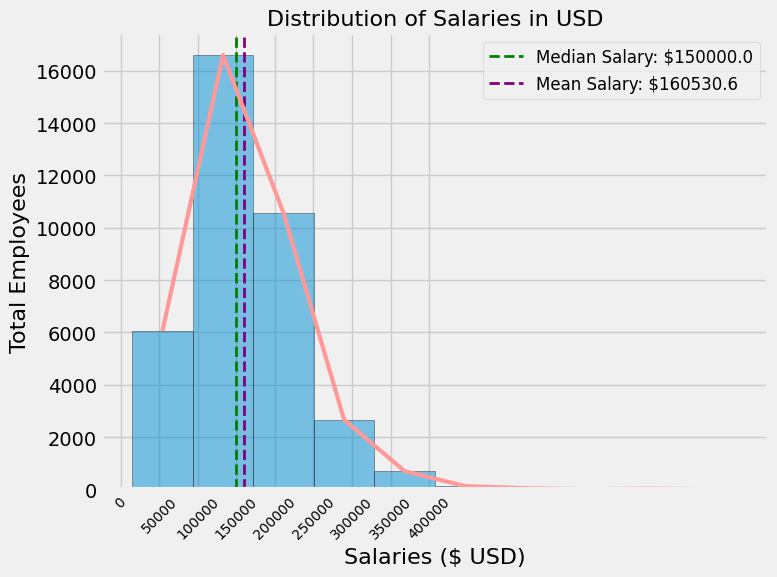

In [103]:
fig = plt.figure(figsize=(8, 6))  # Increase the figure size for more space
n, bins, patches = plt.hist(df['salary_in_usd'], edgecolor='black', alpha=0.5)
median_salary = df['salary_in_usd'].median()
mean_salary = df['salary_in_usd'].mean()

plt.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median Salary: ${median_salary:.1f}')
plt.axvline(mean_salary, color='purple', linestyle='--', linewidth=2, label=f'Mean Salary: ${mean_salary:.1f}')
plt.legend(fontsize=12)

# Set x-ticks with rotation for better readability
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000], rotation=45, fontsize=10)

# Adding title and labels
plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salaries ($ USD)', fontsize=16)
plt.ylabel('Total Employees', fontsize=16)

# Density curve
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, n, linewidth=3, color='#ff9999')

# Show plot
plt.tight_layout()
plt.show()

> * most of the salaries are centered around 142k USD.
> * Most of the salaries are between 50k and 250k USD.
> * the distribution is approximately normal; however, it is slightly skewed to the right.

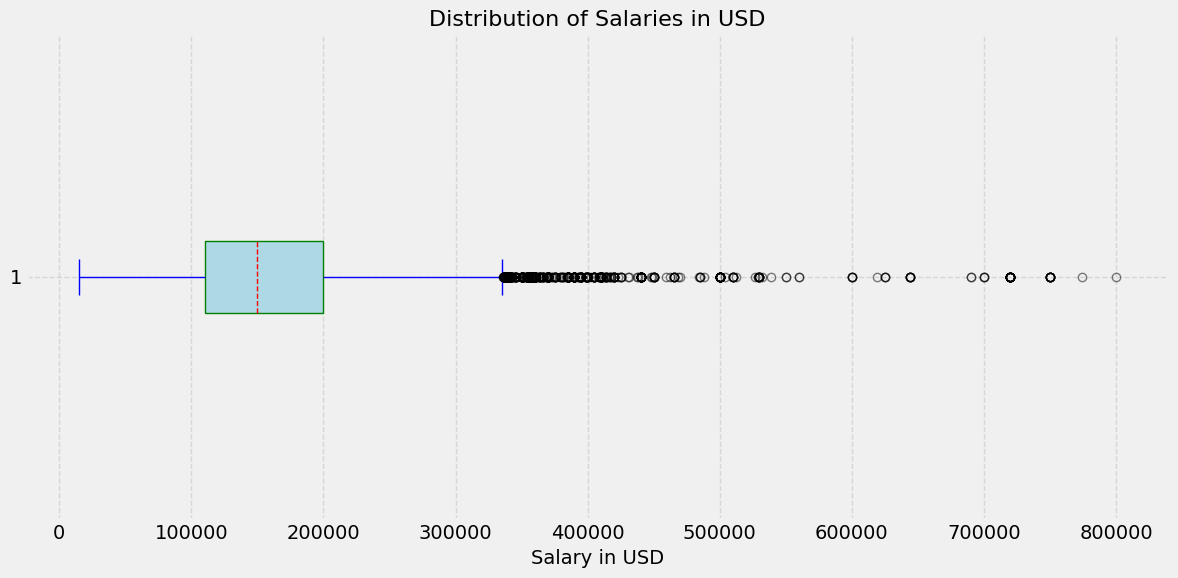

In [104]:
# Increase the figure size for more space
plt.figure(figsize=(12, 6))  

# Create the box plot
plt.boxplot(df['salary_in_usd'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='green'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linestyle='--'),
            flierprops=dict(marker='o', color='red', alpha=0.5))

# Adding title and labels
plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

> * The distribution of salaries in USD, shown as a box plot, showcases potential outliers that are outside of the median and mean distribution of salaries.
> * As also mentioned in the bar chart, the median salary was 142K. The lower and higher quantiles are shown respectively as the border of the box, with the extreme percentiles of the salaries are shown as dark blue lines.
> * The potential outliers are all higher salaries than what is mostly shown from the input file.

#### 4.2.1 Changing the salary of the previous outlier with the median salary for Entry-level roles of Research Engineers ####

In [105]:
avg_salary_research_eng = df[(df['job_title'] == 'Research Engineer')]
df.loc[outlier.index, 'salary_in_usd'] = avg_salary_research_eng
df.loc[outlier.index]

NameError: name 'outlier' is not defined

#### 4.3 What is the distribution of salaries in USD by company size? ####

/var/folders/qn/_m1h0dcx73l2vr_8762ktr9r0000gn/T/ipykernel_15571/761217036.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(salaries, labels=company_sizes, patch_artist=True)


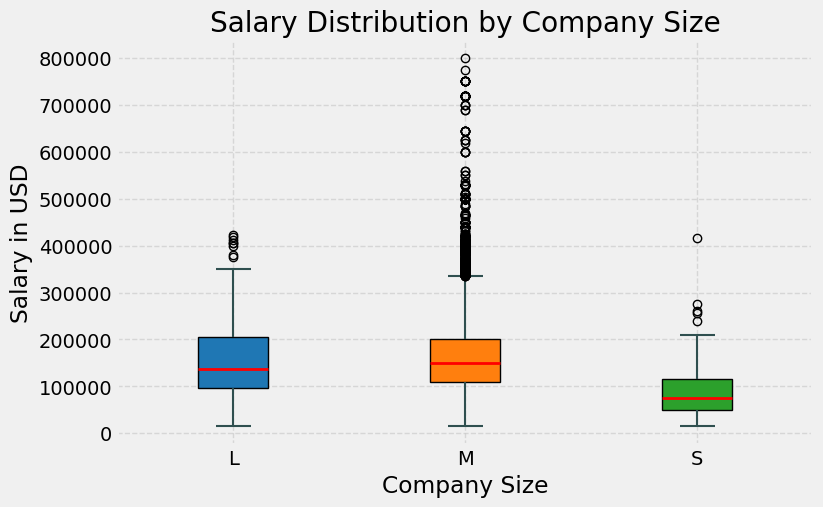

In [ ]:
salary_per_company_size = df.groupby('company_size')['salary_in_usd'].apply(list)

# Extract company sizes and corresponding salary lists
company_sizes = salary_per_company_size.index
salaries = salary_per_company_size.values

# Box plot for distribution 

# Create a box plot
plt.figure(figsize=(8, 5))
box = plt.boxplot(salaries, labels=company_sizes, patch_artist=True)

# Set colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # List of colors for each box

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize whiskers, caps, and medians
for whisker in box['whiskers']:
    whisker.set(color='#2f4f4f', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='#2f4f4f', linewidth=1.5)
for median in box['medians']:
    median.set(color='red', linewidth=2)

# Customize the plot
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### 4.4 How do salaries differ by company size? ####

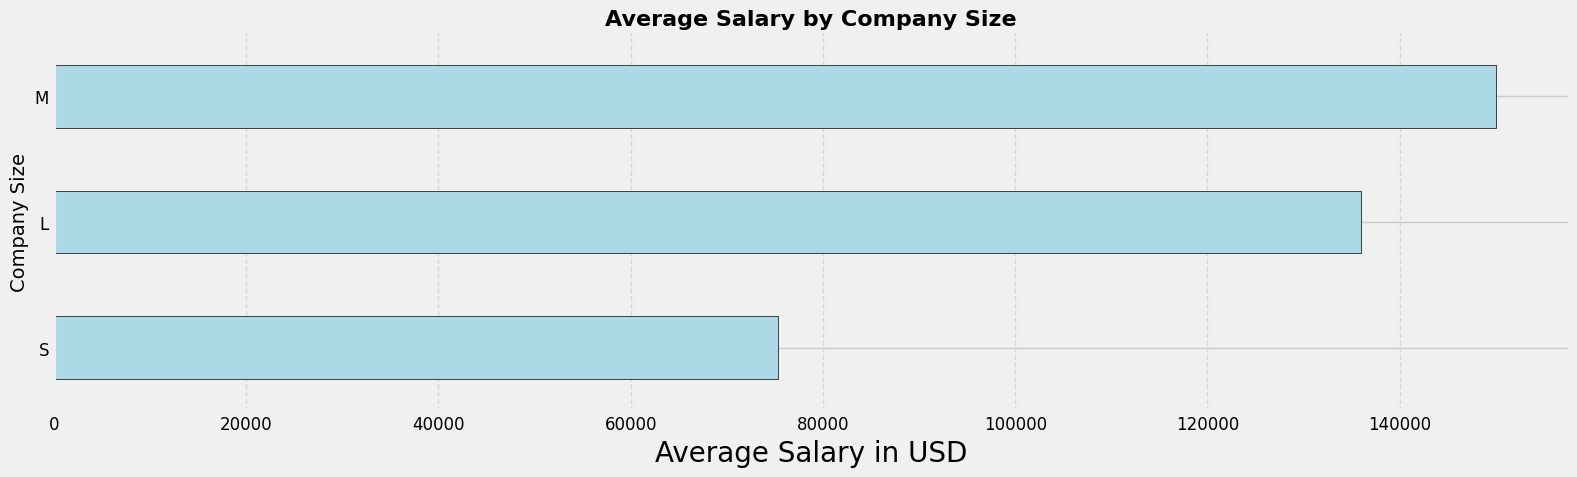

In [ ]:
# Group Average Salaries by company size
avg_salary_per_company_size = df.groupby('company_size')['salary_in_usd'].median().sort_values()
drawBar(avg_salary_per_company_size, 'Average Salary by Company Size', 'Average Salary in USD', 'Company Size', 'barh')

> * Medium-sized companies pay more than large and small-sized companies with an average salary of 144000 USD.

## 4.6 What is the average salary in USD each year? ##

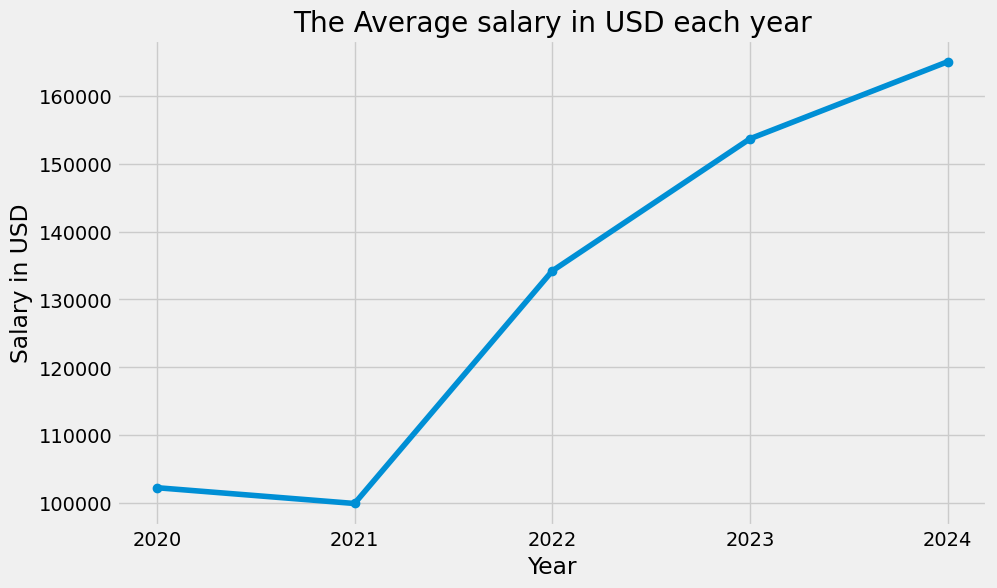

In [ ]:
avg_salary_ber_year = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_ber_year.index, avg_salary_ber_year.values, marker='o', linestyle='-')
plt.xticks([2020,2021,2022,2023,2024])
plt.title('The Average salary in USD each year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()


## 4.7 What is the salary growth rate? ##

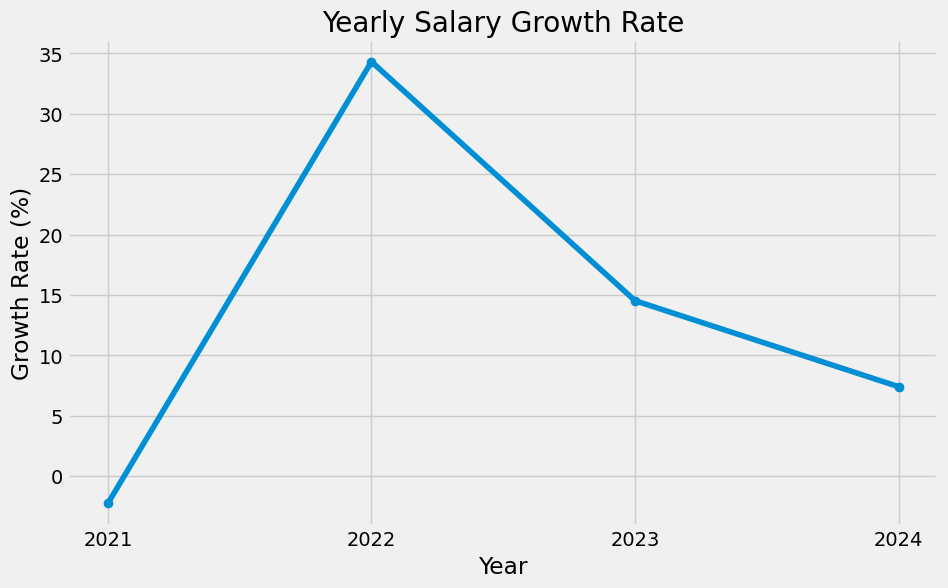

In [ ]:
salary_growth_rate = avg_salary_ber_year.pct_change()*100

plt.figure(figsize=(10, 6))
plt.plot(salary_growth_rate.index, salary_growth_rate.values, marker='o', linestyle='-')
plt.xticks([2021,2022,2023,2024])

plt.title('Yearly Salary Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

## 4.8 What is the average salary in USD?

In [ ]:
int(df['salary_in_usd'].median())

150000

> * Since the distribution of the data is skewed to the right we used the **median** as an average.

## 5. Geographical Analysis ##

#### 5.1 Employee Residence ####

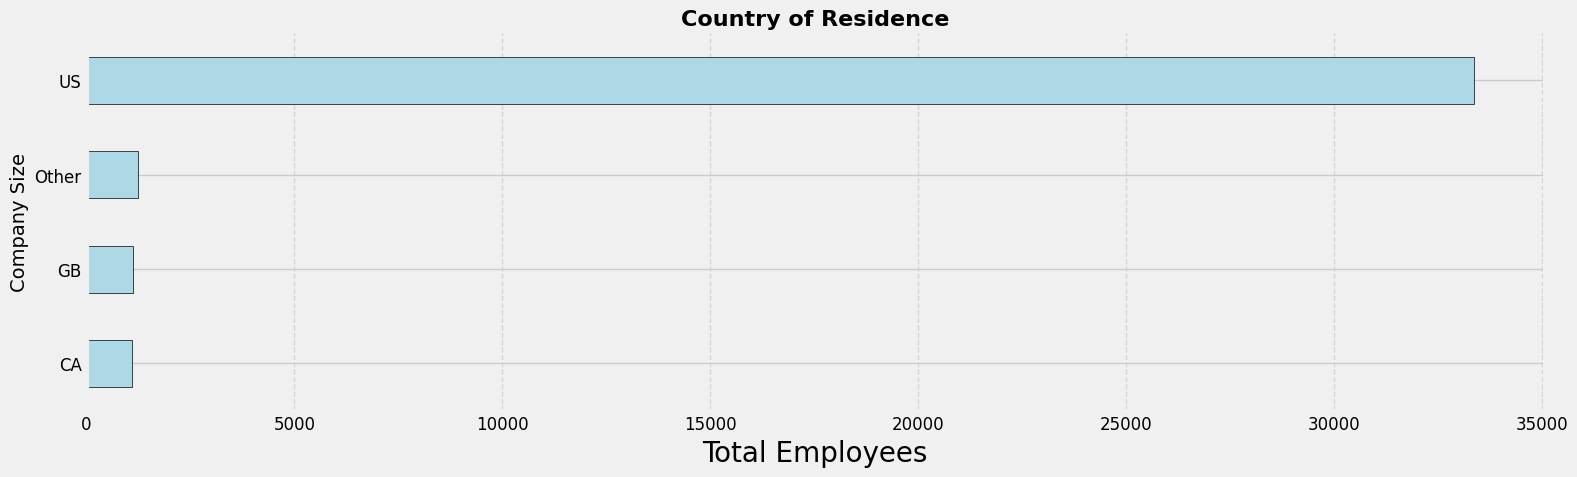

In [ ]:
# Top 3 Employees Residence
top_employee_residence = df['employee_residence'].value_counts().sort_values(ascending=True).tail(3)
# Other employees Residence 
flt = df['employee_residence'].isin(list(top_employee_residence.index))
other_employee_residence = pd.Series(df[~flt]['employee_residence'].value_counts().sum(), index=['Other'])

# Concat the top 3 employees residence with the other employees residence
employee_residence = pd.concat([top_employee_residence, other_employee_residence]).sort_values()


drawBar(employee_residence, 'Country of Residence', 'Total Employees', 'Company Size', 'barh')


> * The table presented above shows that the United States is the most frequent employee's country of residence, being 87.8% of the total. 
> * The 'employee_residence' is one of the most inbalanced feature in the dataset.

## 6. Employment and Work Setting Analysis ##

#### 6.1 How does the type of employment affect salaries? ####

In [ ]:
df_grouped = df.groupby('employment_type')['salary_in_usd'].agg(['mean', 'median', 'std', 'count']).sort_values('mean').reset_index()
df_grouped
                                                            

,employment_type,mean,median,std,count
0,FL,49220.857143,47777.5,24997.262711,14
1,PT,85776.576923,60781.0,71540.044085,52
2,CT,111871.000000,105000.0,76219.420983,45
3,FT,160738.689411,150000.0,72596.361042,36698


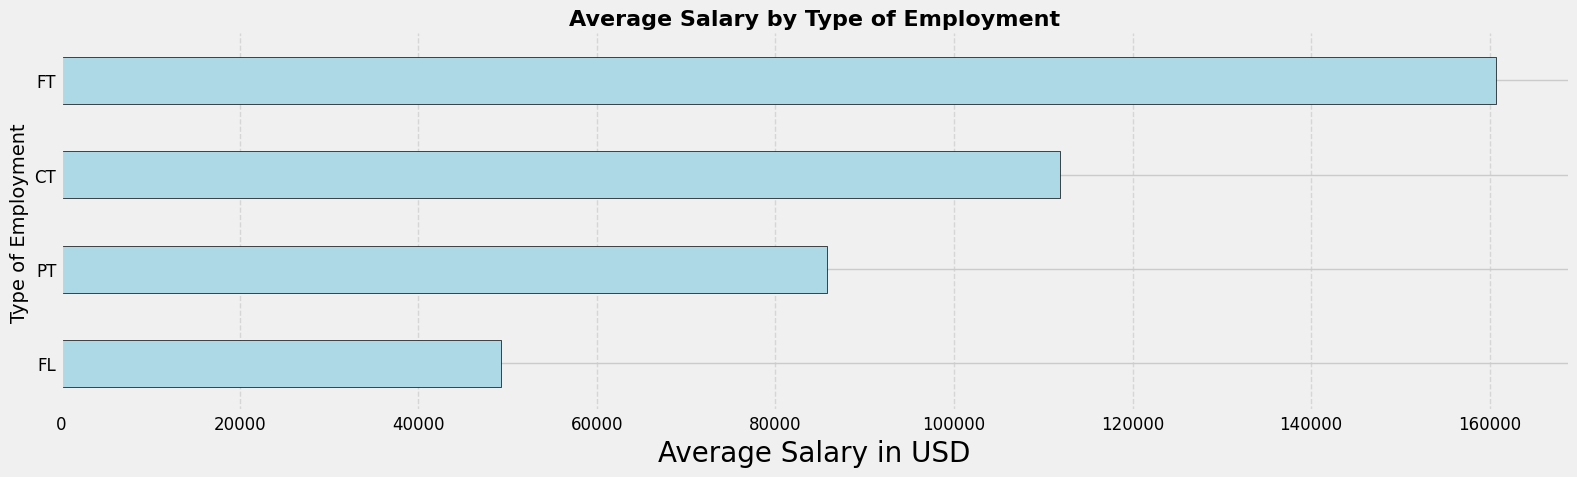

In [ ]:
df_grouped = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()
drawBar(df_grouped, 'Average Salary by Type of Employment', 'Average Salary in USD', 'Type of Employment')


#### 6.3 What is the company location for the highest paid person? ####

In [ ]:
flt = df['salary_in_usd'] == df['salary_in_usd'].max()
df.loc[flt]['company_location'].unique()

array(['CA'], dtype=object)

> * The file mentions the state where the company is located at, and California is where that company is located.

## 7. Job Title Analysis ##

#### 7.1 What are the most common job titles in the dataset? ####

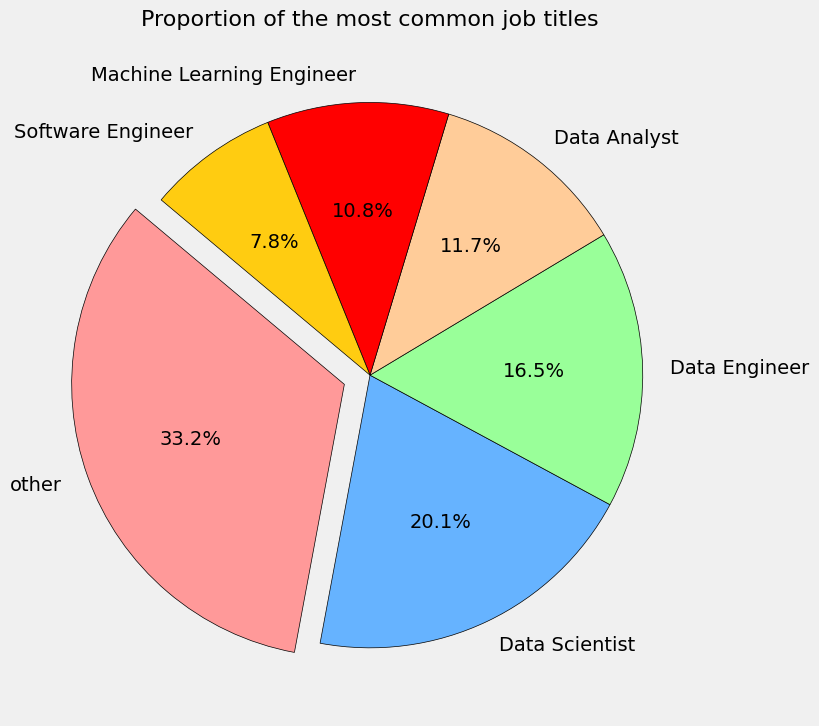

In [ ]:
top_five_common_job_titles = df['job_title'].value_counts().sort_values(ascending=False).head(5)

flt = df['job_title'].isin(top_five_common_job_titles.index)
other_job_titles = pd.Series(df[~flt]['job_title'].value_counts().sum(), index=['other'])


job_titles = pd.concat([other_job_titles, top_five_common_job_titles])

# Colors for each slice
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'red', '#ffcc11']

# Explode effect to highlight the largest slice
explode = [0.1, 0, 0, 0, 0, 0]  # '0.1' slightly separates the second slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_titles.values, labels=job_titles.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})

# Customize the title and layout
plt.title('Proportion of the most common job titles', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

> * Data Engineer is the most common job title with a proportion of 21%, followed by Data Scientist and Data Analyst job title with proportion of 20.5% and 14.9% respectively.
> * The proportion of 29.4% isdistributed over the other 144 job titles.

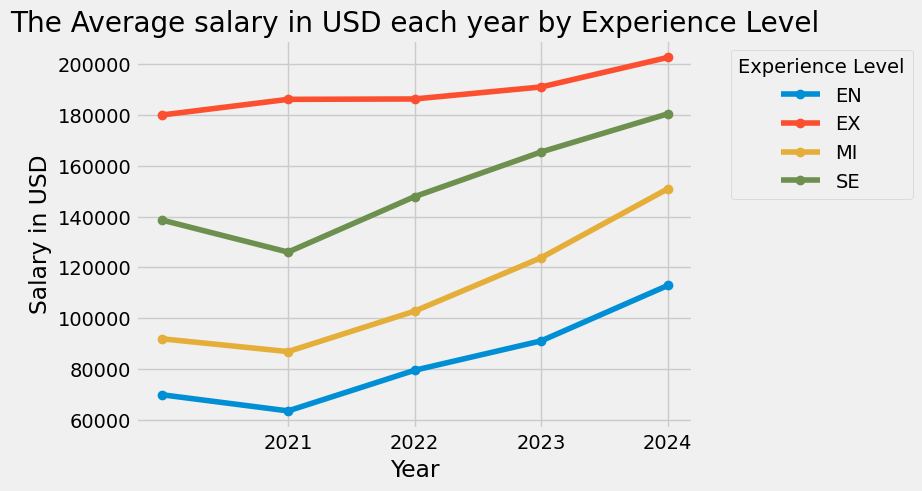

In [ ]:
exp_level_salaries = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()
plt.plot(exp_level_salaries.index, exp_level_salaries.values, label=exp_level_salaries.columns, marker='o', linestyle='-')
plt.xticks([2021,2022,2023,2024])

plt.title('The Average salary in USD each year by Experience Level')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Thank you! #

Thank you for taking the time to explore this project. I hope you found the insights and analysis being presented here informative and useful. Please feel free to reach out if you have any questions or suggestions regarding the portfolio.